### Adding libraries and file 

In [435]:
import pandas as pd
import plotly
import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

import seaborn as sns

import plotly.graph_objects as go
churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.copy()
# присвоение категориальных признаков для улучшения отображения подписей
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 'Exited' if (x == 1) else 'Loyal').astype('category') 

### Task 9.1

In [436]:
data_91 = churn_data
fig = px.pie(
    data_frame=data_91,
    names='Exited',
    height=500,
    width=700,
    title='Exited customers'
)
fig.show()

In [437]:
# По графику можно видеть, 
# что из банка ушла примерно пятая часть всех клиентов

### Task 9.2

In [438]:

data_92 = churn_data[churn_data['Balance'] > 2500]

fig = px.histogram(
    data_frame=data_92,
    x='Balance',
    nbins=25,
    width=800,
    height=800,
    marginal='box',
    title='Customers with more than $2 500'
)

fig.show()



In [439]:
# На гистограмме виден диапазон разброса доходов клиентов. 
# По нему можно сказать, что большая часть клиентов
# зарабатывает примерно от сто до ста сорока тысяч.
# Нижняя граница доходов клиентов равна сорока тысячам, 
# минимальная зарплата по всем клиентам - 3769, максимальная - двести пятьдесят тысяч

### Task 9.3

In [440]:

fig = px.box(
    data_frame=churn_data,
    x='Exited',
    y='Balance',
    color='Exited',
    title='Balance of exited and loyal customers',
    width=600,
    height=600
)
fig.show()

In [441]:
# Проанализировав распределение балансов клиентов, можно наблюдать, 
# что медианное значение баланса ушедших на семнадцать тысяч больше, чем у лояльных клиентов.
# Из этого можно предположить, что ушедших клиентов не устраивали условия - возможно проценты по вкладам - для больших сумм.

### Task 9.4

In [442]:

display((churn_data['Age'] >= 57).value_counts())

fig = px.box(
    data_frame=churn_data,
    x='Exited',
    y='Age',
    color='Exited',
    title='Age of exited and loyal customers',
    width=600,
    height=600
)
fig.show()

False    9270
True      730
Name: Age, dtype: int64

In [443]:
# На графике можно наблюдать, что у оставшихся клиентов больше выбросов,
# начиная с 57 лет.
# В группе ушедших клиентов средний возраст больше - 45 лет против 36 у лояльных клиентов.
# Возможно банку стоит рассмотреть новые условия и предложения для более возрастных клиентов, чтобы сократить отток.

### Task 9.5

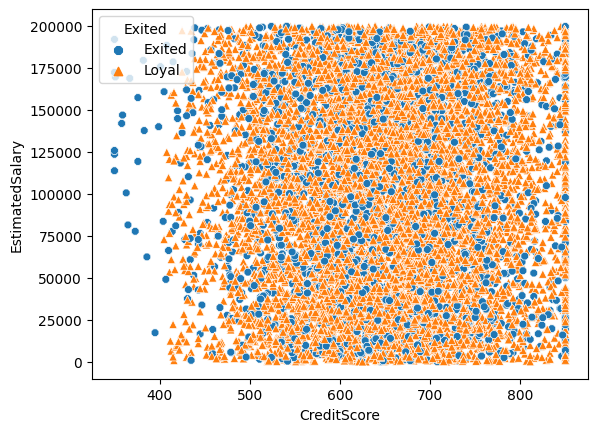

In [444]:
sns.scatterplot(
  x = churn_data['CreditScore'],
  y = churn_data['EstimatedSalary'],
  hue = churn_data['Exited'],
  style=churn_data['Exited'],
  markers= {'Loyal':'^', 'Exited':"8"}
);

In [445]:
# По построенному графику сложно судить о зависимоти зарплаты и кредитном рейтинге.
# Потому что значения примерно равномерно распределенны на графике

### Task 9.6

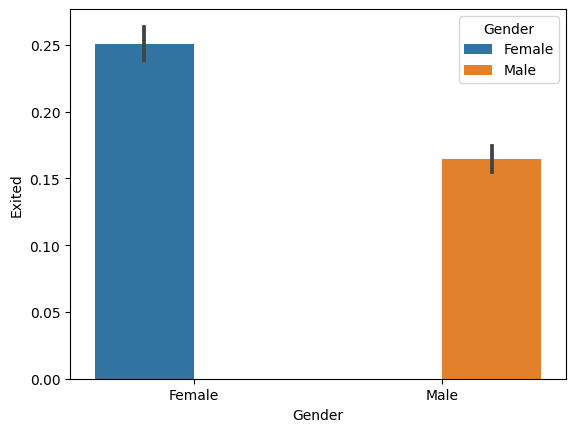

In [446]:
data_96= pd.read_csv('data/churn.csv')
sns.barplot(data=data_96, x='Gender', y="Exited", hue="Gender");

In [447]:
# На этом графике хоршо видно, что среди ушедших клиентов
# преобладают женщины примерно на треть.

### Task 9.7

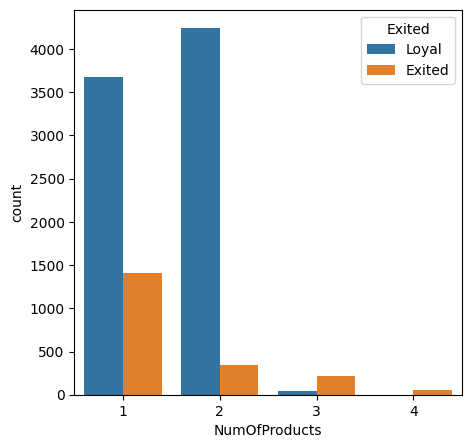

In [457]:
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 'Exited' if (x == 1) else 'Loyal').astype('category') 
fig=plt.figure(figsize=(5, 5))
countplot = sns.countplot(
    data=churn_data,
    x='NumOfProducts',
    hue='Exited',
    hue_order=['Loyal', 'Exited']
)

In [449]:
# Исходя из этого графика, можно сказать, что все клиенты, которые приобрели четыре услуги ушли.
# Также большинство клиентов с тремя услугами тоже ушли.
# Почти все лояльные клиенты банка пользуются только одной или двумя услугами.
# Но опять же мы можем наблюдать, что среди ушедших клиентов основная часть пользовалась только одной услугой.

### Task 9.8

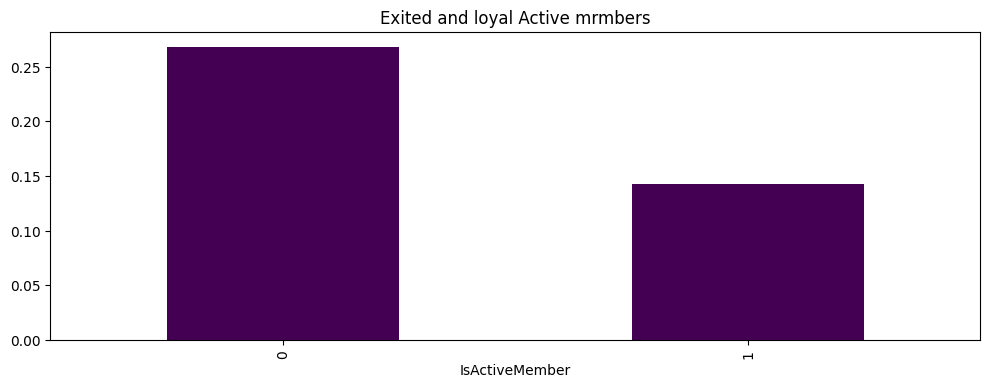

In [450]:
data_98 = pd.read_csv('data/churn.csv').groupby(['IsActiveMember'])['Exited'].mean()
data_98.plot(
    kind='bar',
    figsize=(12, 4),
    colormap='viridis',
    title='Exited and loyal Active mrmbers'
);


In [451]:
# По графику видно, что примерно половина всех ушедших клиентов не имели статуса активного клиента.
# Возможно стоит добавить различные акции, выплату кэшбека при активном пользовании банковскими услугами, чтобы заинтересовать клиентов.


### Task 9.9

In [452]:

data_99 = round(pd.read_csv('data/churn.csv').groupby(['Geography'], as_index=False)['Exited'].mean(), 2)

fig = px.choropleth(
    data_frame=data_99,
    locations="Geography",
    locationmode = "country names", 
    color= 'Exited',
    title='Heatmap of exited clients', 
    width=800, 
    height=500,
    color_continuous_scale='Rainbow'
)
fig.show()

churn_data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [453]:
# Мы видим, что больше всего клиентов уходит в Германии.
# Сложно сказать почему именно Германия, потому что разница между двумя другими странами довольна низкая.
# Исходя из количества клиентов в каждой стране, можно предположить, что банк загеристрирован во Франции.
# Где и находится большинство его офисов, соответственно и клиентов.
# Можно предположить, что в Германии банков больше, из-за этого клиентам есть из чего выбирать.

### Task 9.10

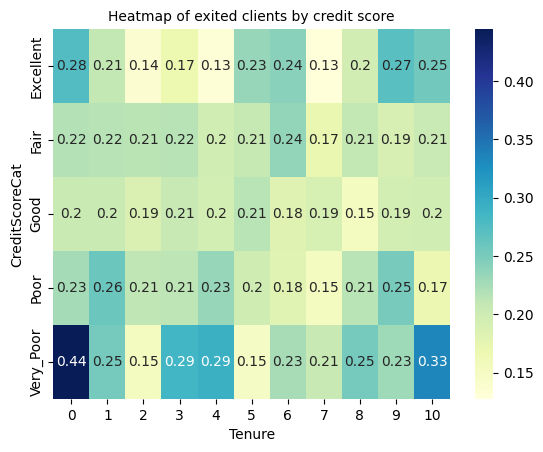

In [454]:

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data = pd.read_csv('data/churn.csv')
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot = churn_data.pivot_table(values='Exited', index='CreditScoreCat', columns='Tenure', aggfunc='mean')

heatmap = sns.heatmap(data=pivot, cmap='YlGnBu', annot=True)
heatmap.set_title('Heatmap of exited clients by credit score', fontsize=10);



In [455]:
# На карте видно, что чаще других уходят клиенты с низким кредитным рейтингом
# и обслуживающиеся в банке меньше года.
# Также часто уходят клиенты с низким рейтингом и обслуживающиеся десять лет